### **Amazon Example for Class**

![](https://images-eu.ssl-images-amazon.com/images/G/30/Consumables/Beauty/2023/header.png)

**Librerías**

In [42]:
# Standard library imports
import itertools
import math
import os
import sys
import time
import warnings
from collections import defaultdict

# Data manipulation and numerical libraries
import numpy as np
import pandas as pd
from scipy import sparse as sp, stats
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy.sparse.linalg import svds
from scipy.special import softmax
from scipy.stats import multivariate_normal

# Text and natural language processing
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Machine Learning and Data Science libraries
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error, silhouette_samples, silhouette_score
from sklearn.metrics.cluster import (
    adjusted_rand_score,
    normalized_mutual_info_score,
    rand_score,
)
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Graph and plot libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cbook import boxplot_stats
from matplotlib.ticker import FixedLocator, FixedFormatter
import seaborn as sns
import plotly.express as px

# Deep Learning libraries
import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import Dataset

# Transformer models
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

# Utility and other specific tools
from adjustText import adjust_text
from tabulate import tabulate
from tqdm.notebook import tqdm

# Recommender systems and specific utilities
import cornac
from cornac.data.text import BaseTokenizer
from cornac.data import GraphModality, ImageModality, TextModality, text as cornac_text
from cornac.datasets import amazon_clothing, filmtrust, movielens
from cornac.eval_methods import RatioSplit
from cornac.models import (
    BPR,
    BaselineOnly,
    CTR,
    ItemKNN,
    MF,
    NMF,
    PMF,
    SVD,
    SoRec,
    UserKNN,
    VBPR,
    WMF,
)
from cornac.utils import cache

# from cornac.datasets.python_splitters import python_random_split
# from cornac.models.cornac.cornac_utils import predict_ranking

# Elasticsearch
from elasticsearch import Elasticsearch, helpers

# from recommenders.utils.timer import Timer
# from recommenders.datasets import movielens
# from recommenders.utils.notebook_utils import store_metadata
# from recommenders.models.recommenders.utils.constants import SEED
# from recommenders.datasets.python_splitters import python_random_split
# from recommenders.evaluation.python_evaluation import (
#    map,
#    ndcg_at_k,
#    precision_at_k,
#    recall_at_k,
# )

# Constants and configurations
SEED = 42
VERBOSE = False
pd.set_option("max_colwidth", 0)
%matplotlib inline

# Printing versions of libraries
print(f"System version: {sys.version}")
print(f"Cornac version: {cornac.__version__}")
print(f"TensorFlow version: {tf.__version__}")

System version: 3.12.3 (v3.12.3:f6650f9ad7, Apr  9 2024, 08:18:47) [Clang 13.0.0 (clang-1300.0.29.30)]
Cornac version: 2.1
TensorFlow version: 2.16.1


#### **0. EDA**

In [43]:
df_path = "ratings_Beauty.csv"
df = pd.read_csv(df_path, header=0)
df.drop("Timestamp", axis=1, inplace=True)

In [44]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
dtypes: float64(1), object(2)
memory usage: 46.3+ MB


In [45]:
df.isna().sum()

UserId       0
ProductId    0
Rating       0
dtype: int64

In [46]:
df.value_counts("Rating", normalize=True) * 100

Rating
5.0    61.724063
4.0    15.211535
1.0    9.084411 
3.0    8.392740 
2.0    5.587251 
Name: proportion, dtype: float64

In [47]:
# * - Obten los productos con mayor número de críticas
item_rate_count = (
    df.groupby("ProductId")["UserId"].nunique().sort_values(ascending=False)
)
item_rate_count  # ? - Get the number of reviews for a product

ProductId
B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
              ... 
B004U81OBC    1   
B004U7R0EI    1   
B004U7Q2O2    1   
B004U7NKRE    1   
B00LU0LTOU    1   
Name: UserId, Length: 249274, dtype: int64

In [48]:
# * - Meter info previa en un dataFrame:
unique_counts = df.nunique()
unique_values = [df[column].unique() for column in df.columns]

# * - Obten en array los tipos de datos por columna:
data_types = [str(df[column].dtype) for column in df.columns]
unique_counts_df = pd.DataFrame(
    {
        "feature": df.columns,
        "unique_count": unique_counts,
        "unique_values": unique_values,
        "data_type": data_types,
    }
)
unique_counts_df

,feature,unique_count,unique_values,data_type
UserId,UserId,1210271,"[A39HTATAQ9V7YF, A3JM6GV9MNOF9X, A1Z513UWSAAO0F, A1WMRR494NWEWV, A3IAAVS479H7M7, AKJHHD5VEH7VG, A1BG8QW55XHN6U, A22VW0P4VZHDE3, A3V3RE4132GKRO, A327B0I7CYTEJC, AIFAAVTUYHEHB, AVOGV98AYOFG2, A6R426V4J7AOM, AKGB62WGF35J8, A3A4C2K3TWDAO5, A3FV2Q7WPZMQPV, A1RXI3A1E99112, A26QL1FBQO9C0E, A19KEEVZYO1KO6, A1F6HRR58TQ2R0, AVQP6PO1NK0IJ, A32IWHU4TUEQZR, ASPJCWRXUOYYY, A1LAW520BT5AM0, A3SWQ2QQ7JBPFA, A2D7CPCZH5VFVZ, A274NIJWOQWE30, A2OMU0R0VM5O9I, A2YFDS6DYGFLVQ, AKA7T9TPISJ26, AN33X95J5460X, A2UEOW698J0SSR, A22ZFXQE8AWPEP, A9ZNJ2AXPO652, A169NC0ZW6XKRD, AZWRTJPN7NXT, AH344ZAN5GNOM, A1YQUT1H2ENJ8U, A3C744AK5A6MMI, A2H6SFTV2892Z8, A225CH9TTQPC4B, A2F6NPTGDMFXN9, A1DC0DSF3H3BCW, A3TR91FJ4MNFY9, A3IANSH41YHFP1, A2NRG4NQMLHDJQ, A32G79IU2NJ2HS, A3L2VTHD6W1E2Z, A15THVWZS6GQZY, A1VCW66KPTNUV8, AO5JB67V93FBL, A1GWD6BDCLGC82, AJ85OD05LNNUY, A1E5CS6UI1LWQF, A1SWCNGOR3GMOQ, A2IOZRH02O4C9S, A1RGXKJ4RFIOCX, A11OEJ4R1PDTLN, AZ4FR14IPKML7, A251DS38L87XWF, A1Z03R982SX8V2, A1ZY0K46FYOTB6, A3MAATZ091QZGE, A35XCJ5P6ZKRE9, A2B3YKKXVN28TW, A2RDR51FRB58LD, A2MSCG0YX85RL4, A2P8AUMTM6O605, A3SN6TKIXQI7RP, A1MLJHYS35C4X6, A2FTLN4PYZE7S6, ATPHIBSTV1NY5, A1QWS6V26JZ5OX, A1VK4ALI1QOF5U, A1GIXQUBPA0DPT, A22L53OZ7IDQX3, AAOU507M8SF9E, A2DIOCFQZQFD9O, A17Z7DO3IFHZOE, A120LZ9VNR3YI0, A39QH03VD9U048, A95YCV8FK2LCM, AP57TEKK91CIM, A3OQ3FVYBU7SBD, A2GDJP70RVLDKY, A2BQ8DVGEGWAFY, A2A0EW34FZH9Z7, A1D6UAVLQUS41B, A2VRUBSVHDDOU9, A276N142RFK6EF, A2HNQ3JHXDSVMW, ADURH4ZDRMZV6, AXVLSEEYTC4Z9, AGGXC77INUISD, A10REFE1TW3ZVT, A3M7ROZKQW6F69, A271KYL82709TY, A1OON4OPP58E26, A3COLQK8Y9V9A5, A28H0PAQPYKN94, ...]",object
ProductId,ProductId,249274,"[0205616461, 0558925278, 0733001998, 0737104473, 0762451459, 1304139212, 1304139220, 130414089X, 130414643X, 1304146537, 130414674X, 1304168522, 1304174778, 1304174867, 1304174905, 1304196046, 1304196062, 1304196070, 1304196135, 1304351475, 1304482596, 1304482634, 1304482685, 1304488608, 1304495396, 1304511073, 1304511081, 1304511111, 130451112X, 1304511138, 1304511146, 1304511154, 1304622193, 1304622223, 1304622428, 1304622452, 1304622460, 1304622622, 1304622657, 1304622665, 1304624498, 1304624544, 1304651029, 1304651088, 130465110X, 1304651118, 1304651347, 1304665704, 1304665720, 130466578X, 1403790965, 1412759676, 1451646526, 1457982633, 1572671203, 1879187396, 1906987238, 1929099886, 1987958179, 3222000565, 322700075X, 3227001055, 3227001381, 3292000971, 3423470476, 360211600X, 4057362797, 4057362843, 4057362886, 4057362894, 4057362967, 4057363823, 4057368825, 4057553908, 5297000963, 5357954771, 535795531X, 535795545X, 5357955743, 5357955751, 5357955786, 5357955832, 5357955867, 5357955905, 5357955948, 5357955972, 5357956014, 5357956111, 5357956227, 6022600685, 602260074X, 6022600790, 6022600804, 6022600812, 6040652705, 6041134473, 604113449X, 6041134511, 6053640972, 6117036094, ...]",object
Rating,Rating,5,"[5.0, 3.0, 4.0, 1.0, 2.0]",float64


In [49]:
def explore_outliers(df, num_vars):
    """
    Explora y identifica los valores atípicos de variables numéricas en un DataFrame.

    Retorna:
    - outliers_df (diccionario): Diccionario con las variables numéricas como claves. Cada valor es otro diccionario
      con las claves 'values' (valores atípicos), 'positions' (posiciones de los valores atípicos en el DataFrame)
      e 'indices' (índices de los valores atípicos en el DataFrame).
    """
    outliers_df = dict()
    for k in range(len(num_vars)):
        var = num_vars[k]
        sns.boxplot(df, x=var)
        outliers_df[var] = boxplot_stats(df[var])[0][
            "fliers"
        ]  # ? - Boxplot de TODOS LOS RATINGS EN NUESTRA MUESTRA
        out_pos = np.where(df[var].isin(outliers_df[var]))[0].tolist()
        out_idx = [df[var].index.tolist()[k] for k in out_pos]
        outliers_df[var] = {
            "values": outliers_df[var],
            "positions": out_pos,
            "indices": out_idx,
        }
    return outliers_df

In [50]:
reviews_per_rating = df[["ProductId", "Rating"]].value_counts()
select_product = (reviews_per_rating >= 20).groupby("ProductId").all()
select_product = select_product.index[select_product].to_list()
df = df.loc[df["ProductId"].isin(select_product)]
df.shape

(195490, 3)

Percentage of outliers: 14.6 %


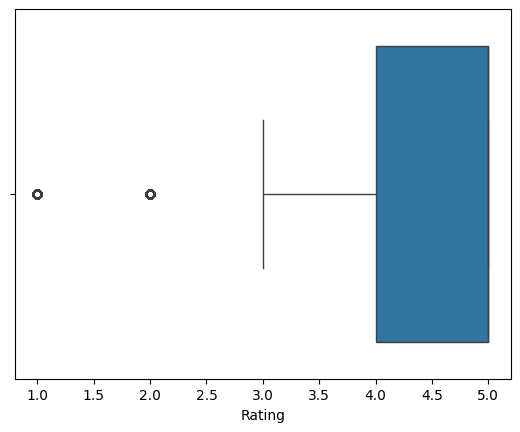

In [97]:
# * Obtener los outliers y visualizar el boxplot.
df = df.sample(10000, random_state=23, ignore_index=True)
outlier_ratings = explore_outliers(df, ["Rating"])

# * Obtener porcentaje de outliers de nuestra muestra:
print(
    "Percentage of outliers:",
    round(len(outlier_ratings.get("Rating").get("indices")) / len(df), 3) * 100,
    "%",
)

# ! - Si hay un sesgo muy claro en el boxplot, NO recomendamos quitar las anomalías para
# ! - capturar todos los comportamientos posibles de usuarios.

In [98]:
# * - Calculo de Sparsity. Nos dice si nuestro dataset exhibe propiedades long-tail
# * - Si el sparsity es alto, yo optaría por hacer Cosine similarity
# * - Como de llena esta nuestra matriz de ratings:
def print_sparsity(df):
    n_users = df.UserId.nunique()
    n_items = df.ProductId.nunique()
    n_ratings = len(df)
    rating_matrix_size = n_users * n_items
    sparsity = 1 - n_ratings / rating_matrix_size

    print(f"Number of users: {n_users}")
    print(f"Number of items: {n_items}")
    print(f"Number of available ratings: {n_ratings}")
    print(f"Number of all possible ratings: {rating_matrix_size}")
    print("-" * 40)
    print(f"SPARSITY: {sparsity * 100.0:.2f}%")


print_sparsity(
    df
)  # * Sparsity alto, por lo tanto debemos optar por el cosine similarity

Number of users: 9898
Number of items: 8132
Number of available ratings: 10000
Number of all possible ratings: 80490536
----------------------------------------
SPARSITY: 99.99%


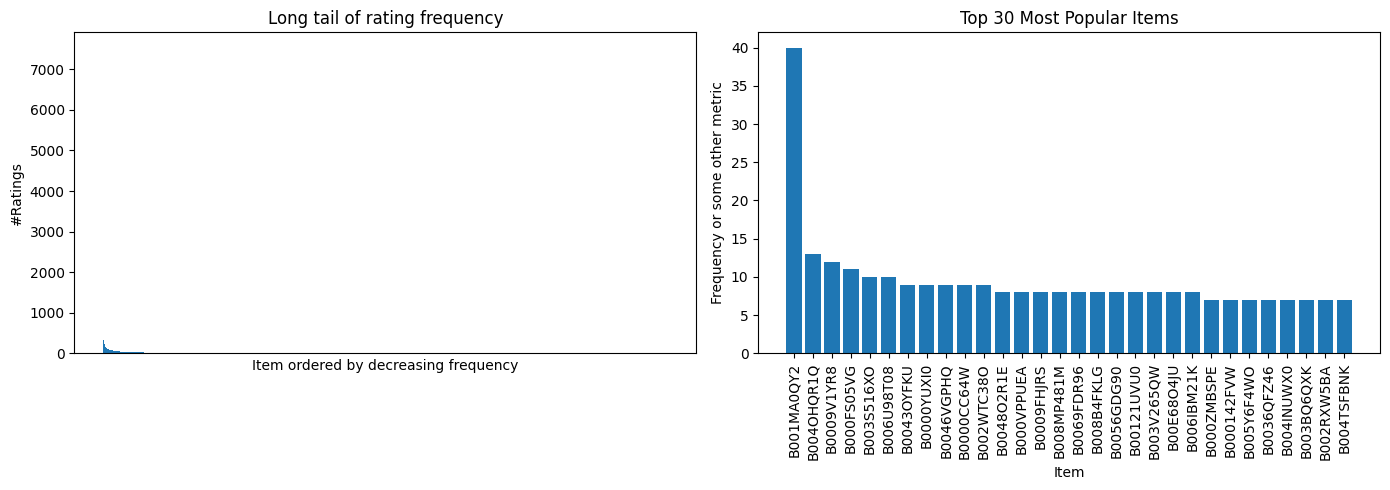

In [99]:
# * - Opcional: Plot para observar si hay long tail property: (CUIDADO CON NOMBRES DE COLS)
popular_products = pd.DataFrame(df.groupby("ProductId")["Rating"].count())
most_popular = popular_products.sort_values("Rating", ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
# First plot
axes[0].bar(
    x=range(len(item_rate_count)),
    height=item_rate_count.values,
    width=5.0,
    align="edge",
)
axes[0].set_xticks([])
axes[0].set(
    title="Long tail of rating frequency",
    xlabel="Item ordered by decreasing frequency",
    ylabel="#Ratings",
)

# Second plot adaptation
# Assuming most_popular is a Series. If it's a DataFrame, you might need to adjust this part.
x_pos = range(len(most_popular.head(30)))  # Generate x positions
axes[1].bar(x=x_pos, height=most_popular.head(30)["Rating"], align="center")
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(most_popular.head(30).index, rotation="vertical")
axes[1].set(
    title="Top 30 Most Popular Items",
    xlabel="Item",
    ylabel="Frequency or some other metric",
)

plt.tight_layout()
plt.show()

#### **1. User-based recommendation**

In [100]:
df.head()

,UserId,ProductId,Rating,Timestamp
0,A28NETRZZGNQNN,B001GIOV8C,5.0,1233360000
1,A3V2Z5651OC7R8,B001E6P6MQ,4.0,1391040000
2,A2D8W4WA9YELPE,B00B4D8XUQ,4.0,1399852800
3,A1RLQXYNCMWRWN,B004FJHEHY,5.0,1359849600
4,A2JED4KXRSWSA,B000FGC99O,1.0,1297296000


In [114]:
# * Generar la matriz de ratings:
ratings_matrix = df.pivot_table(
    index="UserId",
    columns="ProductId",
    values="Rating",
)

ratings_matrix

ProductId,1451646526,4057553908,753865058X,9788073409,9788080669,9790771584,9790778309,979079035X,9790790961,B00004TMFE,...,B00KAL5JAU,B00KD73PBQ,B00KECCJTY,B00KHH2VOY,B00KIWJ1W8,B00KNCUMDU,B00KQVTX06,B00KWE08Q0,B00L3KEIZO,B00LCLFMDG
UserId,,,,,,,,,,,,,,,,,,,,,
A00407141VL6SB77B1GGG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A00473363TJ8YSZ3YAGG9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0056746VLX0I5VJCFN6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A05198112VVJ1HUQ3SWU5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A05510841IANN1R9RQYTZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZXZJMSR6FNAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZY5X93OVEWO7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZYJE40XW6MFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Mean Rating', ylabel='Count'>

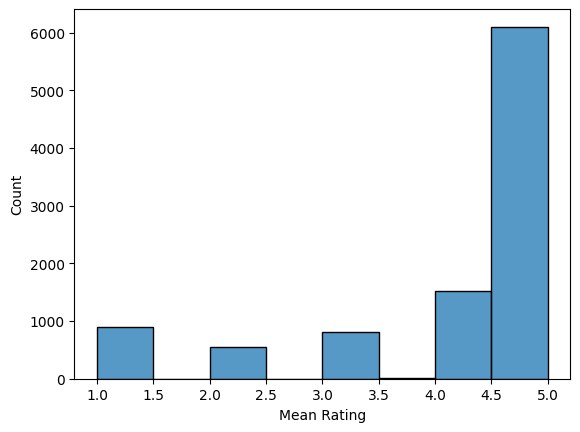

In [116]:
df_rm = ratings_matrix
df_rm["Mean Rating"] = df_rm.mean(axis=1)
sns.histplot(x="Mean Rating", binwidth=0.5, data=df_rm)

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

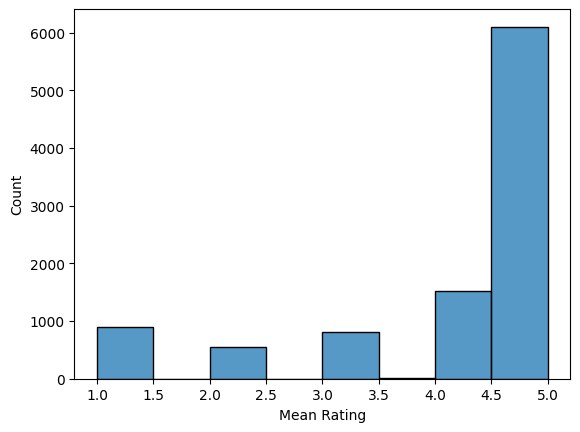

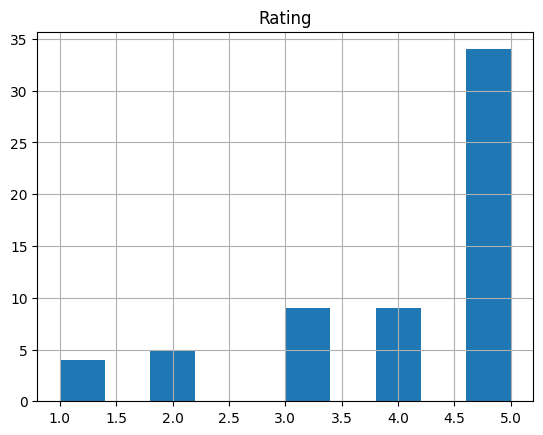

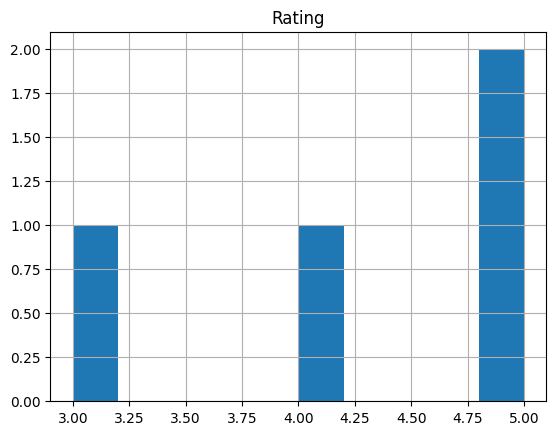

In [117]:
# * EDA de la matriz de ratings:
ratings_matrix.head()
df_rm = ratings_matrix  #! - Cuidado antes de pegar esta linea
df_rm["Mean Rating"] = df_rm.mean(axis=1)  # ? - Get the mean score for each user
sns.histplot(
    x="Mean Rating", binwidth=0.5, data=df_rm
)  # ? - Histograma de la media de puntuación

# * PARA PODER HACER ITEM Y USER PROFILING
# * User-profiling para User-based
# ? - Dataset para agrupar los items
df_user_10k = (
    pd.read_csv("ratings_Beauty.csv").set_index("UserId").drop("Timestamp", axis=1)
)
items = df_user_10k.groupby(
    "ProductId"
)  # ? - Obtener lista de productos criticados por usuario
items.get_group("B002OVV7F0")  # ? - Pass ProductId - Get the ratings

# ? - Dataset para agrupar los users
df_item_10k = (
    pd.read_csv("ratings_Beauty.csv").set_index("ProductId").drop("Timestamp", axis=1)
)
users = df_item_10k.groupby("UserId")  # ? - Obtener lista de usuarios por producto
users.get_group("A39HTATAQ9V7YF")  # ? - Pass UserId - Get the ratings for a user

# ? - Observar distribución ratings producto especifico:
df_item_10k.loc["B0050QLE4U"].hist()
# ? - Observar distribución ratings user especifico:
df_user_10k.loc["A39HTATAQ9V7YF"].hist()

In [118]:
# * Normalise the ratings matrix by subtracting every user's rating by the mean users rating:
normalized_ratings_matrix = ratings_matrix.subtract(ratings_matrix.mean(axis=1), axis=0)


# * Generación de modelos user-based con Pearson, Cosine y centrados
def userknn_cornac(df: pd.DataFrame):
    # * Cuidado con el nombre de las columnas, a veces es userId, otras UserId
    df = df.astype({"UserId": object, "ProductId": object})
    records = df.to_records(index=False)
    result = list(records)

    K = 18  #! - Si te da error, baja el numero de k number of nearest neighbors
    VERBOSE = False
    SEED = 42
    uknn_cosine = UserKNN(
        k=K, similarity="cosine", name="UserKNN-Cosine", verbose=VERBOSE
    )
    uknn_cosine_mc = UserKNN(
        k=K,
        similarity="cosine",
        mean_centered=True,
        name="UserKNN-Cosine-MC",
        verbose=VERBOSE,
    )
    uknn_pearson = UserKNN(
        k=K, similarity="pearson", name="UserKNN-Pearson", verbose=VERBOSE
    )
    uknn_pearson_mc = UserKNN(
        k=K,
        similarity="pearson",
        mean_centered=True,
        name="UserKNN-Pearson-MC",
        verbose=VERBOSE,
    )

    # Metrics
    rec_300 = cornac.metrics.Recall(k=K)
    prec_30 = cornac.metrics.Precision(k=K)
    rmse = cornac.metrics.RMSE()
    mae = cornac.metrics.MAE()

    ratio_split = RatioSplit(result, test_size=0.1, seed=SEED, verbose=VERBOSE)
    cornac.Experiment(
        eval_method=ratio_split,
        models=[uknn_cosine, uknn_cosine_mc, uknn_pearson, uknn_pearson_mc],
        metrics=[rec_300, prec_30, rmse, mae],
    ).run()

    userknn_models = {
        "uknn_cosine": uknn_cosine,
        "uknn_cosine_mc": uknn_cosine_mc,
        "uknn_pearson": uknn_pearson,
        "uknn_pearson_mc": uknn_pearson_mc,
    }

    return userknn_models

In [119]:
df.shape
df = df.head(10000)

In [120]:
userknn_models = userknn_cornac(df)  # ? - Returns the data with the Metrics
model = userknn_models.get(
    "uknn_cosine_mc"
)  # * Because of low sparticity we're taking the mc cosine
# ?^^Luego tendras que justificar que modelo eliges. Esta bien que cojamos el mean centered (mc)


TEST:
...
                   |    MAE |   RMSE | Precision@18 | Recall@18 | Train (s) | Test (s)
------------------ + ------ + ------ + ------------ + --------- + --------- + --------
UserKNN-Cosine     | 1.0000 | 1.0000 |       0.0000 |    0.0000 |    0.4980 |   0.0956
UserKNN-Cosine-MC  | 1.0000 | 1.0000 |       0.0000 |    0.0000 |    0.4907 |   0.0953
UserKNN-Pearson    | 1.0000 | 1.0000 |       0.0000 |    0.0000 |    0.4903 |   0.0914
UserKNN-Pearson-MC | 1.0000 | 1.0000 |       0.0000 |    0.0000 |    0.5198 |   0.0936



In [121]:
def user_profiling(UID, model, user_df, TOPK=5):

    rating_mat = model.train_set.matrix

    UIDX = list(model.train_set.uid_map.items())[UID][0]

    print(f"UserID = {UIDX}")
    print("-" * 35)
    print(user_df.loc[UIDX])

    ratings = pd.DataFrame(rating_mat.toarray())
    user_ratings = ratings.loc[UID]
    top_rated_items = np.argsort(user_ratings)[-TOPK:]
    print(f"\nTOP {TOPK} RATED ITEMS BY USER {UID}:")
    print("-" * 35)
    print(user_df.iloc[top_rated_items.array])

In [122]:
df_user = pd.read_csv("ratings_Beauty.csv").set_index("UserId")
df_user.head()

,ProductId,Rating,Timestamp
UserId,,,
A39HTATAQ9V7YF,0205616461,5.0,1369699200
A3JM6GV9MNOF9X,0558925278,3.0,1355443200
A1Z513UWSAAO0F,0558925278,5.0,1404691200
A1WMRR494NWEWV,0733001998,4.0,1382572800
A3IAAVS479H7M7,0737104473,1.0,1274227200


In [123]:
top_rated_items = user_profiling(3, model, df_user, TOPK=10)

UserID = A1N58DE9ZH8HR1
-----------------------------------
ProductId    B008YKNHN0
Rating       5.0       
Timestamp    1365811200
Name: A1N58DE9ZH8HR1, dtype: object

TOP 10 RATED ITEMS BY USER 3:
-----------------------------------
                 ProductId  Rating   Timestamp
UserId                                        
A3O4C1EA1O5SWP  B00004TMFE  2.0     1371254400
AN2WR1JLFTR1H   B00004TMFE  2.0     1346371200
A1SQZJIRATK95A  B00004TMFE  5.0     1319760000
A34M18U6T33YDZ  B00004TMFE  5.0     1396828800
A3W488NZMIW9LD  B00004TMFE  5.0     1349740800
A16NAH39LN211W  B00004TMFE  5.0     1395446400
A1ISPXMZL1IYSE  B00004TMFE  2.0     1358726400
A149N75TZ34CE5  B00004TMFE  1.0     1373760000
A1E5DVHYS3TQVG  B000052YM7  4.0     1273449600
A1WMRR494NWEWV  0733001998  4.0     1382572800


In [124]:
# * Predicción de score para cualquier producto para un user especifico:
def uknn_get_scores(UID, model, user_df, TOPK=5):

    UIDX = list(model.train_set.uid_map.items())[UID][0]
    recommendations, scores = model.rank(UID)
    print(f"\nTOP {TOPK} RECOMMENDATIONS FOR USER {UIDX}:")
    print("Scores:", scores[recommendations[:TOPK]])
    print(user_df.iloc[recommendations[:TOPK]])

In [125]:
predicted_ratings = pd.DataFrame(
    model.train_set.matrix.toarray(),
    columns=list(model.train_set.iid_map.items()),
    index=list(model.train_set.uid_map.items()),
)

predicted_ratings.head()

,"(B00957Y17C, 0)","(B001LEYYJ2, 1)","(B0011GD5CM, 2)","(B008YKNHN0, 3)","(B001B8QIGA, 4)","(B001E96MQM, 5)","(B000F8JUJY, 6)","(B00AF52FQW, 7)","(B000ALBLZ2, 8)","(B005KUGUBS, 9)",...,"(B0052DNBR4, 7399)","(B001AKB47C, 7400)","(B004QPIQJM, 7401)","(B00B1MG5JQ, 7402)","(B000Q2ZQ56, 7403)","(B00CLBLQYK, 7404)","(B003E1B6UU, 7405)","(B001TRTGJO, 7406)","(B000LTQA6I, 7407)","(B00BBA7OES, 7408)"
"(AIXCVKMHYOYFR, 0)",4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(A1K6AKH56HMTGK, 1)",0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(A9QUSEMHTXYTA, 2)",0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(A1N58DE9ZH8HR1, 3)",0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(A7MOT1CZP2GJF, 4)",0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
user_model = userknn_models.get("uknn_pearson_mc")
item_mat_id = user_model.train_set.iid_map.get("B001LEYYJ2")
user_mat_id = user_model.train_set.uid_map.get("A1K6AKH56HMTGK")
# * Get the rating
user_model.score(user_mat_id, item_mat_id)  # * Wow, un 0

5.00000001

#### **2. Item-based**

In [127]:
def itemknn_cornac(df):
    # * Cuidado aquí con los nombres de las columnas
    df = df.astype({"UserId": object, "ProductId": object})
    records = df.to_records(index=False)
    result = list(records)
    K = 18  # ! - number of nearest neighbors
    VERBOSE = False
    SEED = 42
    iknn_cosine = ItemKNN(
        k=K, similarity="cosine", name="ItemKNN-Cosine", verbose=VERBOSE
    )
    iknn_cosine_mc = ItemKNN(
        k=K,
        similarity="cosine",
        mean_centered=True,
        name="ItemKNN-Cosine-MC",
        verbose=VERBOSE,
    )
    iknn_pearson = ItemKNN(
        k=K, similarity="pearson", name="ItemKNN-Pearson", verbose=VERBOSE
    )
    iknn_pearson_mc = ItemKNN(
        k=K,
        similarity="pearson",
        mean_centered=True,
        name="ItemKNN-Pearson-MC",
        verbose=VERBOSE,
    )

    # Metrics
    rmse = cornac.metrics.RMSE()
    mae = cornac.metrics.MAE()
    prec = cornac.metrics.Precision(k=K)
    ratio_split = RatioSplit(result, test_size=0.2, seed=SEED, verbose=VERBOSE)
    cornac.Experiment(
        eval_method=ratio_split,
        models=[iknn_cosine, iknn_pearson, iknn_pearson_mc, iknn_cosine_mc],
        metrics=[rmse, mae, prec],
    ).run()
    itemknn_models = {
        "iknn_cosine": iknn_cosine,
        "iknn_pearson": iknn_pearson,
        "iknn_pearson_mc": iknn_pearson_mc,
        "iknn_cosine_mc": iknn_cosine_mc,
    }
    return itemknn_models

In [128]:
def item_profiling(UID, model, item_df, TOPK=5):

    rating_mat = model.train_set.matrix

    UIDX = list(model.train_set.iid_map.items())[UID][0]

    print(f"ProductID = {UIDX}")
    print("-" * 35)
    print(item_df.loc[UIDX])

    ratings = pd.DataFrame(rating_mat.toarray())
    item_ratings = ratings.iloc[UID]
    top_rated_items = np.argsort(item_ratings)[-TOPK:]
    print(f"\nTOP {TOPK} RECOMMENDED USERS FOR ITEM {UID}:")
    print("-" * 35)
    print(df_item_10k.iloc[top_rated_items.array])

In [129]:
def itemknn_get_scores(
    UID, model, item_df, TOPK=5
):  # ? En caso que quieras una función más especifica a los ratings: (Puedes pasar)
    UIDX = list(model.train_set.iid_map.items())[UID][0]
    recommendations, scores = model.rank(UID)
    print(f"\nTOP {5} USERS FOR ITEM {UIDX}:")
    print("Scores:", scores[recommendations[:TOPK]])
    print(item_df.iloc[recommendations[:TOPK]])

In [130]:
itemknn_models = itemknn_cornac(
    df
)  # * Pearson MC is the highest Precision, so let's go with that one


TEST:
...
                   |    MAE |   RMSE | Precision@18 | Train (s) | Test (s)
------------------ + ------ + ------ + ------------ + --------- + --------
ItemKNN-Cosine     | 1.1250 | 1.1250 |       0.0000 |    0.3693 |   0.0922
ItemKNN-Pearson    | 1.1250 | 1.1250 |       0.0000 |    0.3241 |   0.0825
ItemKNN-Pearson-MC | 1.1250 | 1.1250 |       0.0000 |    0.3366 |   0.0989
ItemKNN-Cosine-MC  | 1.1250 | 1.1250 |       0.0000 |    0.2950 |   0.0870



In [131]:
item_model = itemknn_models.get(
    "iknn_pearson_mc"
)  #!!! - SUPER IMPORTANTE HACER LA ELECCIÓN DEL MODELO

In [132]:
# * Get the top rated items for a specific user
top_rated_items = item_profiling(2, model, df_item_10k)

ProductID = B0011GD5CM
-----------------------------------
                    UserId  Rating
ProductId                         
B0011GD5CM  A11RU2YNML78P1  5.0   
B0011GD5CM  A1POFYCQ9096DU  5.0   
B0011GD5CM  A2UO3JTBIQV1UM  5.0   
B0011GD5CM  A2WBFDC7SDHPT6  5.0   
B0011GD5CM  AFEU4FI71UYNJ   5.0   
B0011GD5CM  A3QV0ZJJ7R8R91  5.0   
B0011GD5CM  AZP9Z4R8JKE     5.0   
B0011GD5CM  A9QUSEMHTXYTA   3.0   
B0011GD5CM  A1NX16398HCGX1  5.0   
B0011GD5CM  A8RIPCG68GRZN   5.0   
B0011GD5CM  A1PO9TVZO5BOV   1.0   

TOP 5 RECOMMENDED USERS FOR ITEM 2:
-----------------------------------
                    UserId  Rating
ProductId                         
B00004TMFE  A16NAH39LN211W  5.0   
B00004TMFE  A1ISPXMZL1IYSE  2.0   
B00004TMFE  A149N75TZ34CE5  1.0   
B000052YM7  A1E5DVHYS3TQVG  4.0   
0558925278  A1Z513UWSAAO0F  5.0   


In [133]:
df_item_10k.head()

,UserId,Rating
ProductId,,
0205616461,A39HTATAQ9V7YF,5.0
0558925278,A3JM6GV9MNOF9X,3.0
0558925278,A1Z513UWSAAO0F,5.0
0733001998,A1WMRR494NWEWV,4.0
0737104473,A3IAAVS479H7M7,1.0


In [134]:
# * Indice del item, modelo seleccionado, y le pasas el dataset
itemknn_get_scores(3, model, df_item_10k)


TOP 5 USERS FOR ITEM B008YKNHN0:
Scores: [5.00000001 5.         5.         5.         5.        ]
                    UserId  Rating
ProductId                         
0733001998  A1WMRR494NWEWV  4.0   
B000052YM7  A1E5DVHYS3TQVG  4.0   
B00004TMFE  A149N75TZ34CE5  1.0   
B00004TMFE  A1ISPXMZL1IYSE  2.0   
B00004TMFE  A16NAH39LN211W  5.0   


In [135]:
# * Get the predictions matrix filled in
predicted_ratings = pd.DataFrame(
    model.train_set.matrix.toarray(),
    columns=list(model.train_set.iid_map.items()),
    index=list(model.train_set.uid_map.items()),
)

predicted_ratings.head()

,"(B00957Y17C, 0)","(B001LEYYJ2, 1)","(B0011GD5CM, 2)","(B008YKNHN0, 3)","(B001B8QIGA, 4)","(B001E96MQM, 5)","(B000F8JUJY, 6)","(B00AF52FQW, 7)","(B000ALBLZ2, 8)","(B005KUGUBS, 9)",...,"(B0052DNBR4, 7399)","(B001AKB47C, 7400)","(B004QPIQJM, 7401)","(B00B1MG5JQ, 7402)","(B000Q2ZQ56, 7403)","(B00CLBLQYK, 7404)","(B003E1B6UU, 7405)","(B001TRTGJO, 7406)","(B000LTQA6I, 7407)","(B00BBA7OES, 7408)"
"(AIXCVKMHYOYFR, 0)",4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(A1K6AKH56HMTGK, 1)",0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(A9QUSEMHTXYTA, 2)",0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(A1N58DE9ZH8HR1, 3)",0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(A7MOT1CZP2GJF, 4)",0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
item_mat_id = item_model.train_set.iid_map.get("B001LEYYJ2")
user_mat_id = item_model.train_set.uid_map.get("A1K6AKH56HMTGK")
item_model.score(user_mat_id, item_mat_id)

5.00000001

#### **3. Model-Based**

**3.1 SVD**

In [138]:
# * - Función para generar el módelo SVD
def svd_cornac(
    df, k_min=10, k_max=2000, step=100
):  # ! - Modificar dependiendo del dataset
    """
    Ejecuta experimentos SVD para un rango de valores de 'k' sobre un DataFrame utilizando Cornac.

    Devuelve:
    - (lista, cornac.Experiment): Lista de modelos SVD entrenados y el objeto experimento con los resultados.

    """
    # * Cuidado aquí con las columnas - userId o UserId
    df = df.astype({"UserId": object, "ProductId": object})
    records = df.to_records(index=False)
    result = list(records)

    VERBOSE = False
    SEED = 42

    svd_models = []
    k_values = np.arange(k_min, k_max, step)
    for k in k_values:
        svd_models.append(
            SVD(
                name="SVD" + str(k),
                k=k,
                max_iter=30,
                learning_rate=0.01,
                lambda_reg=0.02,
                verbose=True,
            )
        )

    # Metrics
    rmse = cornac.metrics.RMSE()
    mae = cornac.metrics.MAE()

    ratio_split = RatioSplit(result, test_size=0.1, seed=SEED, verbose=VERBOSE)
    svd_experiment = cornac.Experiment(
        eval_method=ratio_split,
        models=svd_models,
        show_validation=True,
        metrics=[rmse, mae],
    )
    svd_experiment.run()

    return svd_models, svd_experiment

In [139]:
svd_models, svd_experiment = svd_cornac(df, 100, 500, 50)

  0%|          | 0/30 [00:00<?, ?it/s]

Optimization finished!


  0%|          | 0/30 [00:00<?, ?it/s]

Optimization finished!


  0%|          | 0/30 [00:00<?, ?it/s]

Optimization finished!


  0%|          | 0/30 [00:00<?, ?it/s]

Optimization finished!


  0%|          | 0/30 [00:00<?, ?it/s]

Optimization finished!


  0%|          | 0/30 [00:00<?, ?it/s]

Optimization finished!


  0%|          | 0/30 [00:00<?, ?it/s]

Optimization finished!


  0%|          | 0/30 [00:00<?, ?it/s]

Optimization finished!

TEST:
...
       |    MAE |   RMSE | Train (s) | Test (s)
------ + ------ + ------ + --------- + --------
SVD100 | 0.9274 | 0.9274 |    0.0605 |   0.0016
SVD150 | 0.9280 | 0.9280 |    0.0782 |   0.0009
SVD200 | 0.9275 | 0.9275 |    0.1058 |   0.0011
SVD250 | 0.9279 | 0.9279 |    0.1408 |   0.0007
SVD300 | 0.9264 | 0.9264 |    0.1991 |   0.0011
SVD350 | 0.9254 | 0.9254 |    0.1807 |   0.0008
SVD400 | 0.9268 | 0.9268 |    0.1715 |   0.0007
SVD450 | 0.9266 | 0.9266 |    0.2769 |   0.0032



In [140]:
# * Función para hacer el plot comparando el número de dimensiones latentes vs. Error RMSE.
# * Propósito: Obtener el K óptimo
def plot_rmse_cornac(experiment, metric_name="RMSE"):
    metric_values = []
    names_models = []
    for i in range(len(experiment.result)):
        metric_values.append(
            svd_experiment.result[i].metric_avg_results.get(metric_name)
        )
        names_models.append(svd_experiment.result[i].model_name)

    plt.xlabel("Latent Dimensions")
    plt.ylabel("RMSE")
    plt.title("SVD")
    plt.plot(names_models, metric_values, "o-")
    plt.show()

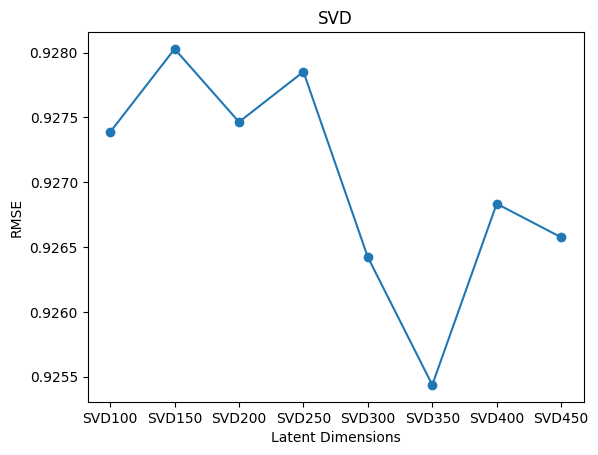

In [141]:
plot_rmse_cornac(svd_experiment)

# * El numero optimo es K = 46?

In [142]:
# * En caso de querer hacer un baseline model para SVD - Solo considerando los bias:
df = df.astype({"UserId": object, "ProductId": object})
records = df.to_records(index=False)
result = list(records)

# ? - Instantiate an evaluation method to split data into train and test sets.
ratio_split = cornac.eval_methods.RatioSplit(
    data=df.values, test_size=0.1, verbose=True
)

# ? - Instantiate the models of interest
bo = cornac.models.BaselineOnly(
    max_iter=30, learning_rate=0.01, lambda_reg=0.02, verbose=True
)

# Instantiate evaluation measures
mae = cornac.metrics.MAE()
rmse = cornac.metrics.RMSE()

# Instantiate and run an experiment.
cornac.Experiment(eval_method=ratio_split, models=[bo], metrics=[mae, rmse]).run()
# ? - Tras ejecutar esto compara con el bloque de arriba

rating_threshold = 1.0
exclude_unknowns = True
---
Training data:
Number of users = 8917
Number of items = 7420
Number of ratings = 9000
Max rating = 5.0
Min rating = 1.0
Global mean = 4.1
---
Test data:
Number of users = 8917
Number of items = 7420
Number of ratings = 9
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 8917
Total items = 7420

[BaselineOnly] Training started!


  0%|          | 0/30 [00:00<?, ?it/s]

Optimization finished!

[BaselineOnly] Evaluation started!


Rating:   0%|          | 0/9 [00:00<?, ?it/s]


TEST:
...
             |    MAE |   RMSE | Train (s) | Test (s)
------------ + ------ + ------ + --------- + --------
BaselineOnly | 0.9010 | 0.9010 |    0.0510 |   0.0060



In [143]:
# * Función para recomendar a un usuario mediante el indice su producto
def recommend_products(index, model, data, num_products=5):

    print(
        "Name of Model:", model.name
    )  # ? - Sustituir el n, por el indice del modelo con menor RMSE

    # Rank all test items for a given user.
    df_rank = pd.DataFrame(
        {"ranked_items": model.rank(index)[0], "item_scores": model.rank(index)[1]},
        columns=["ranked_items", "item_scores"],
    )
    print("Target UserId", data.iloc[index].UserId)  # * Cuidado aqui con el df_smaple

    df_rank.sort_values("item_scores", ascending=False, inplace=True)

    print(
        "Recommended products:",
        data.iloc[df_rank.head(num_products).ranked_items.values]["ProductId"].values,
    )
    print("Predicted scoreds: ", df_rank.head(num_products).item_scores.values)

In [144]:
svd_models

In [145]:
recommend_products(1, svd_models[7], df)

Name of Model: SVD450
Target UserId A3V2Z5651OC7R8
Recommended products: ['B000JNLMF0' 'B001BKM6ZA' 'B001SERK9G' 'B000ELP5KA' 'B003VJTRFQ']
Predicted scoreds:  [4.950256  4.9276724 4.9024224 4.897957  4.880681 ]


**3.2. Matrix Factorisation**

In [146]:
pandas_df = pd.read_csv("ratings_Beauty.csv")
df = pandas_df.astype({"UserId": object, "ProductId": object})
records = df.to_records(index=False)
result = list(records)

# * Data split and calculate the RMSE
rs = RatioSplit(result, test_size=0.2, seed=SEED, verbose=VERBOSE)
rmse = cornac.metrics.RMSE()

K = 10
lbd = 0.01  # ? Lambda -> Regularisation
mf = MF(
    k=K,
    max_iter=20,
    learning_rate=0.01,
    lambda_reg=lbd,
    use_bias=False,
    verbose=VERBOSE,
    seed=SEED,
    name=f"MF(K={K},lambda={lbd:.4f})",
)

# * Execute the MF model
cornac.Experiment(eval_method=rs, models=[mf], metrics=[rmse]).run()
# ? - ^^If you only have one model.


TEST:
...
                       |   RMSE | Train (s) | Test (s)
---------------------- + ------ + --------- + --------
MF(K=10,lambda=0.0100) | 2.6731 |    1.2377 |   4.9911



In [147]:
# * NMF: Variant where the latent factors are constrained to be non-negative
# * Ideal for non-negative factors like image processing, text mining, and rec. systems.
# * As there are no negative factors.
# * Allows for better interpretabiliy to reason with positive values:
def mf_cornac(df, K=10):
    df = df.astype({"UserId": object, "ProductId": object})
    records = df.to_records(index=False)
    result = list(records)
    VERBOSE = False
    SEED = 42
    lbd = 0.01
    baseline = BaselineOnly(
        max_iter=20, learning_rate=0.01, lambda_reg=lbd, verbose=VERBOSE
    )
    mf1 = MF(
        k=K,
        max_iter=20,
        learning_rate=0.01,
        lambda_reg=0.0,
        use_bias=False,
        verbose=VERBOSE,
        seed=SEED,
        name=f"MF(K={K})",
    )
    mf2 = MF(
        k=K,
        max_iter=20,
        learning_rate=0.01,
        lambda_reg=lbd,
        use_bias=False,
        verbose=VERBOSE,
        seed=SEED,
        name=f"MF(K={K},lambda={lbd:.4f})",
    )
    mf3 = MF(
        k=K,
        max_iter=20,
        learning_rate=0.01,
        lambda_reg=lbd,
        use_bias=True,
        verbose=VERBOSE,
        seed=SEED,
        name=f"MF(K={K},bias)",
    )
    nmf = NMF(
        k=K,
        max_iter=200,
        learning_rate=0.01,
        use_bias=False,
        verbose=VERBOSE,
        seed=SEED,
        name=f"NMF(K={K})",
    )
    pmf = PMF(
        k=K,
        max_iter=50,
        learning_rate=0.001,
        lambda_reg=0.01,
        verbose=VERBOSE,
        seed=SEED,
    )
    ratio_split = RatioSplit(result, test_size=0.1, seed=SEED, verbose=VERBOSE)
    cornac.Experiment(
        eval_method=ratio_split,
        models=[baseline, mf1, mf2, mf3, nmf, pmf],
        metrics=[cornac.metrics.RMSE()],
    ).run()

    mf_models = {
        "baseline": baseline,
        "mf1": mf1,
        "mf2": mf2,
        "mf3": mf3,
        "nmf": nmf,
        "pmf": pmf,
    }

    return mf_models

In [148]:
K = 10
mf_models = mf_cornac(df, K)


TEST:
...
                       |   RMSE | Train (s) | Test (s)
---------------------- + ------ + --------- + --------
BaselineOnly           | 0.9050 |    0.0803 |   2.8226
MF(K=10)               | 2.3467 |    1.3876 |   2.9809
MF(K=10,lambda=0.0100) | 2.3440 |    1.4771 |   3.0006
MF(K=10,bias)          | 0.9051 |    1.6000 |   2.8746
NMF(K=10)              | 1.2468 |   33.6176 |   2.9391
PMF                    | 1.6025 |   28.3070 |   2.8193



<Axes: title={'center': 'MF Factors for model: <cornac.models.mf.recom_mf.MF object at 0x3d0464410>'}, xlabel='Factor', ylabel='Variance'>

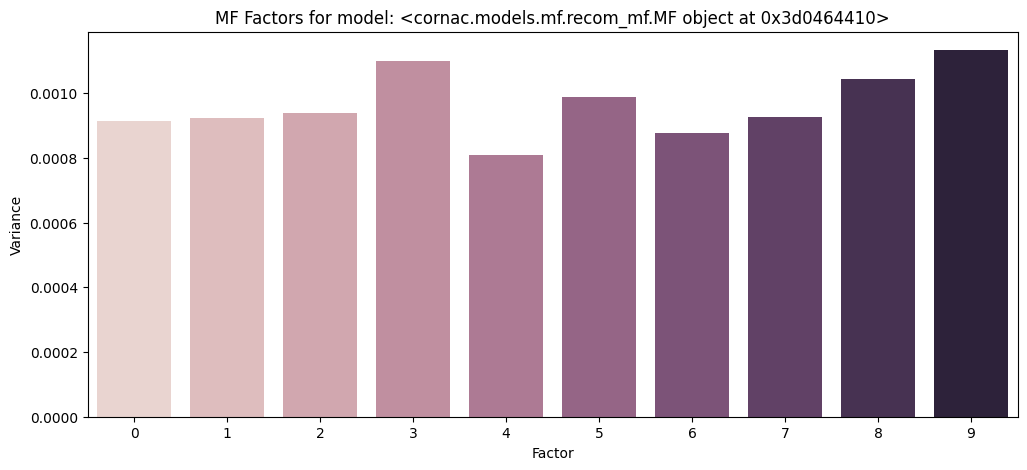

In [149]:
model = mf_models.get("mf3")  # ? - Selecciona el que mejor RMSE tenga
var_df = pd.DataFrame(
    {"Factor": np.arange(K), "Variance": np.var(model.i_factors, axis=0)}
)

# * Observar la info y varianza de cada dimensión latente del MF
fig, ax = plt.subplots(figsize=(12, 5))
plt.title(f"MF Factors for model: {model}")
sns.barplot(x="Factor", y="Variance", data=var_df, hue="Factor", legend=False, ax=ax)
# TODO: When is NMF vs. MF relevant? And how about choosing between SVD and MF?
# * Con NMF estas forzando que los autovalores sean positivos, para poder mejorar su interpretabilidad
# * PMF -> Probabilistic Matrix Factorisation -> Y esa casi siempre mejora (Estudiaría así - Hazte un esquema)

**3.3 KMeans for any model**

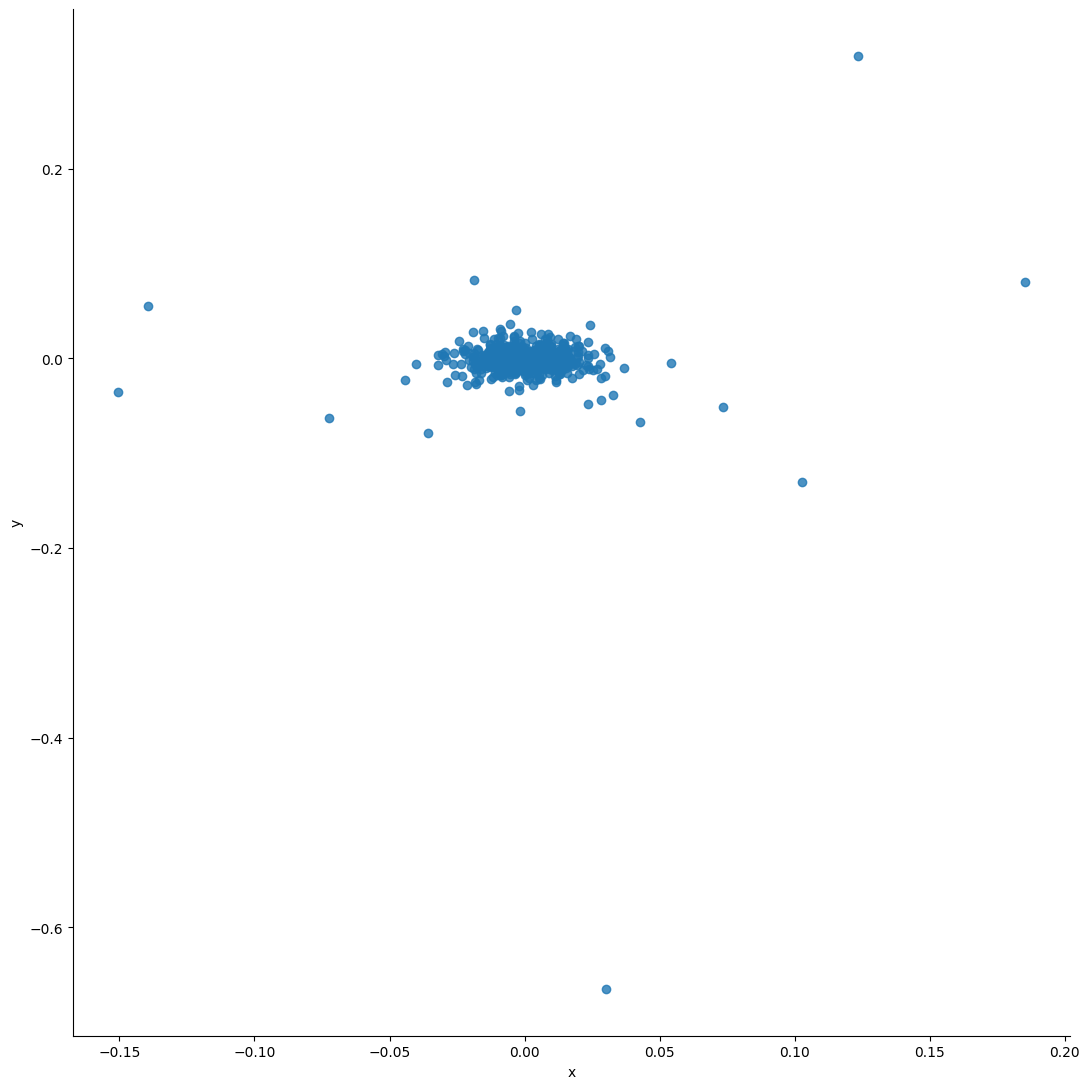

In [156]:
TOP2F = (3, 9)  # * Modificar a los factores más significativos
SAMPLE_SIZE = 500

mf = model
rng = np.random.RandomState(42)
sample_inds = rng.choice(np.arange(mf.i_factors.shape[0]), size=SAMPLE_SIZE)
sample_df = pd.DataFrame(data=mf.i_factors[sample_inds][:, TOP2F], columns=["x", "y"])
sns.lmplot(x="x", y="y", data=sample_df, height=11.0, fit_reg=False)

In [157]:
def pick_centroids(data, k):
    indexes = np.random.choice(len(data), size=k, replace=False)
    centroids = data[indexes]
    return centroids


def assign_cluster(data, centroids):
    # Pairwise squared L2 distances. Shape [n, k]
    distances = ((data[:, np.newaxis] - centroids) ** 2).sum(axis=2)
    # find closest centroid index. Shape [n]
    clusters = np.argmin(distances, axis=1)
    return clusters


def update_centroids(data, clusters, k):
    # Mean positions of data within clusters
    centroids = [np.mean(data[clusters == i], axis=0) for i in range(k)]
    return np.array(centroids)

In [162]:
class KMEANS:
    def __init__(self, k):
        self.k = k

    def fit(self, data, steps=20):
        self.centroids = pick_centroids(data, self.k)
        for step in range(steps):
            clusters = assign_cluster(data, self.centroids)
            self.centroids = update_centroids(data, clusters, self.k)

    def predict(self, data):
        return assign_cluster(data, self.centroids)

In [163]:
kmeans = KMEANS(k=3)
data = sample_df.to_numpy()
kmeans.fit(data)
clusters = kmeans.predict(data)

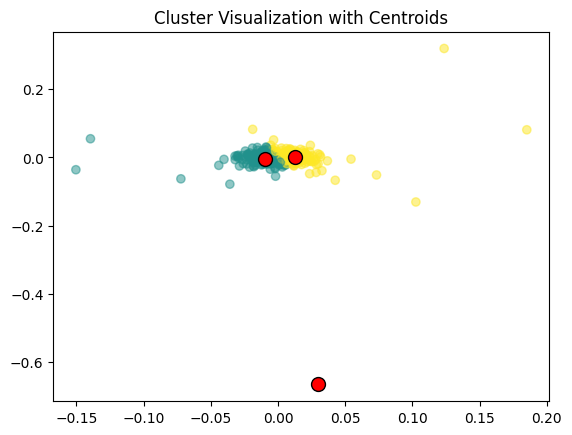

In [164]:
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap="viridis", alpha=0.5)
plt.scatter(
    kmeans.centroids[:, 0],
    kmeans.centroids[:, 1],
    c="red",
    s=100,
    edgecolor="black",
    label="Centroids",
)
plt.title("Cluster Visualization with Centroids")
plt.grid(False)
plt.show()

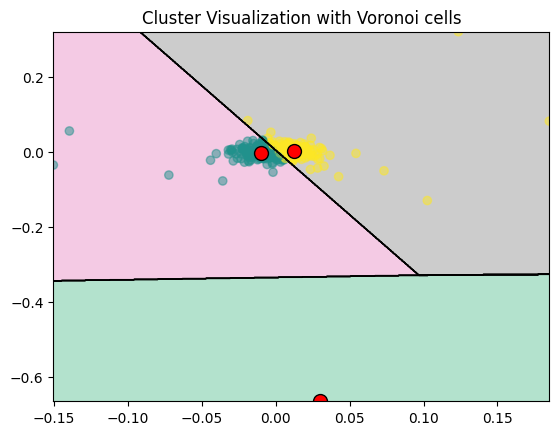

In [165]:
def plot_decision_boundaries(clusterer, X, resolution=1000):
    plt.figure()
    mins = X.min(axis=0)
    maxs = X.max(axis=0)
    xx, yy = np.meshgrid(
        np.linspace(mins[0], maxs[0], resolution),
        np.linspace(mins[1], maxs[1], resolution),
    )
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.title("Cluster Visualization with Voronoi cells")
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(
        Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors="k"
    )
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap="viridis", alpha=0.5)
    plt.scatter(
        kmeans.centroids[:, 0],
        kmeans.centroids[:, 1],
        c="red",
        s=100,
        edgecolor="black",
        label="Centroids",
    )
    plt.show()


plot_decision_boundaries(kmeans, data)

#### **4. Conclusions and Comparisons**